### TRAIN MODEL

In [1]:
import pandas as pd
import numpy as np

In [9]:
train_data = pd.read_csv('train_data_new', sep=";")

In [10]:
train_data.head()

,user_id,post_id,target,timestamp,Topic,text_length,likes,posts_views,likes_share,age,City,business,covid,entertainment,movie,politics,sport,tech,views,ratio of likes posts
0,200,37,0,2021-12-29 15:11:05,10.513725,3634,2810.0,22136.0,12.0,34,0.133222,0.0,0.1875,0.141042,0.071429,0.166667,0.0,0.25,51.0,0.117647
1,200,167,0,2021-12-29 15:01:08,10.513725,1940,1154.0,8310.0,13.0,34,0.133222,0.0,0.1875,0.141042,0.071429,0.166667,0.0,0.25,51.0,0.117647
2,200,213,0,2021-12-24 14:02:13,10.513725,2923,2885.0,22261.0,12.0,34,0.133222,0.0,0.1875,0.141042,0.071429,0.166667,0.0,0.25,51.0,0.117647
3,200,994,1,2021-12-29 15:18:42,10.388489,2572,2829.0,22375.0,12.0,34,0.133222,0.0,0.1875,0.141042,0.071429,0.166667,0.0,0.25,51.0,0.117647
4,200,1122,0,2021-12-29 15:23:54,10.388489,1995,2816.0,22532.0,12.0,34,0.133222,0.0,0.1875,0.141042,0.071429,0.166667,0.0,0.25,51.0,0.117647


In [11]:
train_data_update = train_data.sort_values('timestamp')

In [65]:
train_data_update.head()

,user_id,post_id,target,timestamp,Topic,text_length,likes,posts_views,likes_share,age,City,business,covid,entertainment,movie,politics,sport,tech,views,ratio of likes posts
1364185,91677,5385,1,2021-12-23 14:36:32,10.733667,432,702.0,6759.0,10.0,17,0.159781,0.000000,0.0,0.000000,0.250000,0.131974,0.142722,0.200000,15.0,0.133333
4950977,161005,6782,0,2021-12-23 14:36:32,10.733667,2872,684.0,6633.0,10.0,15,0.092855,0.000000,0.0,0.000000,0.000000,0.131974,0.142722,0.116242,15.0,0.000000
4580075,40293,6437,1,2021-12-23 14:36:32,10.733667,705,713.0,6834.0,10.0,15,0.158675,0.138777,0.0,0.000000,0.222222,0.131974,0.142722,0.000000,15.0,0.133333
4642628,133794,3545,0,2021-12-23 14:36:32,10.595331,140,2591.0,16898.0,15.0,52,0.097577,0.138777,0.0,0.141042,0.000000,0.131974,0.000000,0.000000,15.0,0.000000
4904478,26676,3330,1,2021-12-23 14:36:32,10.595331,126,732.0,6832.0,10.0,20,0.148598,0.138777,0.2,0.000000,0.000000,0.131974,0.142722,0.000000,15.0,0.066667


In [22]:
print(f"Quantity 'target' = 0 : {train_data_update[train_data_update['target']==0].shape[0]}")
print(f"Quantity 'target' = 1 : {train_data_update[train_data_update['target']==1].shape[0]}")
print(f"Rate 0 to 1 : {train_data_update[train_data_update['target']==0].shape[0]/train_data_update[train_data_update['target']==1].shape[0]:.2f}")

Quantity 'target' = 0 : 4295656
Quantity 'target' = 1 : 689177
Rate 0 to 1 : 6.23


In [23]:
from sklearn.model_selection import train_test_split

X = train_data_update.drop(columns=['target','timestamp'])
y = train_data_update['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=False, #предварительно посортировали по дате
                                                    test_size=0.2)

X_train_clear = X_train.drop(columns=['user_id', 'post_id'])
X_test_clear = X_test.drop(columns=['user_id', 'post_id'])

### First model:
#### Classical Logistic Regression with Standard Scaler

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
model_LR = LogisticRegression(random_state=42, verbose=0,class_weight='balanced')
pipe_LR = Pipeline([('scaler', StandardScaler()), ('LR', model_LR)])
pipe_LR 

Pipeline(steps=[('scaler', StandardScaler()),
                ('LR',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [27]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate
splitter = TimeSeriesSplit(n_splits=5)
pipe_LR.fit(X_train_clear, y_train)
cv_model_LR = cross_validate(pipe_LR, X_train_clear, y_train,
                              scoring='roc_auc',cv=splitter,return_train_score=True)

In [56]:
from sklearn.metrics import classification_report, f1_score, roc_curve, auc

predict_train = pipe_LR.predict(X_train_clear)
predict_test = pipe_LR.predict(X_test_clear)
f1_train_lg = round(f1_score(y_train, predict_train),3)
f1_test_lg = round(f1_score(y_test, predict_test),3)

print(f'F1 LogReg score train = {f1_train_lg}, on test = {f1_test_lg}')

F1 LogReg score train = 0.321, on test = 0.322


In [57]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score

predict_test = pipe_LR.predict(X_test_clear)

recall_log = round(recall_score(y_test, predict_test),3)
precision_log = round(precision_score(y_test, predict_test),3)
roc_auc_log = round(roc_auc_score(y_test, predict_test),3)

print(f'Log reg on test: Recall = {recall_log}, Precision = {precision_log}, Roc_auc= {roc_auc_log}')

Log reg on test: Recall = 0.62, Precision = 0.218, Roc_auc= 0.626


In [86]:
import joblib, pickle
joblib.dump(pipe_LR, 'model_first_LogReg.pkl')
#pipe_LR = joblib.load('logistic_regression_model.pkl')

['model_first_LogReg.pkl']

### Second model:
####  CatBoostClassifier

In [46]:
from catboost import CatBoostClassifier
cat_boost = CatBoostClassifier(iterations=300, verbose=50)

cat_boost.fit(X_train_clear, y_train)

Learning rate set to 0.5
0:	learn: 0.4314179	total: 892ms	remaining: 4m 26s
50:	learn: 0.3025313	total: 24.3s	remaining: 1m 58s
100:	learn: 0.3004009	total: 46.3s	remaining: 1m 31s
150:	learn: 0.2993545	total: 1m 8s	remaining: 1m 7s
200:	learn: 0.2987615	total: 1m 30s	remaining: 44.6s
250:	learn: 0.2983479	total: 1m 53s	remaining: 22.1s
299:	learn: 0.2979215	total: 2m 15s	remaining: 0us


In [54]:
from sklearn.metrics import classification_report, f1_score, roc_curve, auc

predict_train = cat_boost.predict(X_train_clear)
predict_test = cat_boost.predict(X_test_clear)
f1_train_catboost = round(f1_score(y_train, predict_train),3)
f1_test_catboost  = round(f1_score(y_test, predict_test),3)

print(f'F1 Catboost score train {f1_train_catboost}, on test {f1_test_catboost}')


F1 Catboost score train 0.225, on test 0.214


In [58]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score

predict_test = cat_boost.predict(X_test_clear)

recall_catboost = round(recall_score(y_test, predict_test),3)
precision_catboost = round(precision_score(y_test, predict_test),3)
roc_auc_catboost = round(roc_auc_score(y_test, predict_test),3)

print(f'Catboos test: Recall = {recall_catboost}, Precision = {precision_catboost}, Roc_auc = {roc_auc_catboost}')


Catboos test: Recall = 0.129, Precision = 0.629, Roc_auc = 0.558


In [59]:
cat_boost.save_model('model_second_catboost', format="cbm")

### Comparison of models:
* Classical Logistic Regression
* CatBoostClassifier

In [61]:
print(f'F1 LogReg score train = {f1_train_lg}, on test = {f1_test_lg}')
print(f'F1 Catboost score train {f1_train_catboost}, on test {f1_test_catboost}')

F1 LogReg score train = 0.321, on test = 0.322
F1 Catboost score train 0.225, on test 0.214


In [62]:
print(f'Log reg on test: Recall = {recall_log}, Precision = {precision_log}, Roc_auc= {roc_auc_log}')
print(f'Catboos test: Recall = {recall_catboost}, Precision = {precision_catboost}, Roc_auc = {roc_auc_catboost}')

Log reg on test: Recall = 0.62, Precision = 0.218, Roc_auc= 0.626
Catboos test: Recall = 0.129, Precision = 0.629, Roc_auc = 0.558


In [73]:
prob =  cat_boost.predict_proba(X_test_clear)

In [74]:
first_class_prob = []
for row in range(X_test.shape[0]):
    first_class_prob.append(prob[row][1])

In [75]:
X_test['prob'] = first_class_prob
X_test['target'] = y_test

## Average Hitrate@5 for test users

In [64]:
prob_log =  pipe_LR.predict_proba(X_test_clear)
prob_Catboost =  cat_boost.predict_proba(X_test_clear)

In [66]:
first_class_prob_log = []
first_class_prob_Catboost = []
for row in range(X_test.shape[0]):
    first_class_prob_log.append(prob_log[row][1])
    first_class_prob_Catboost.append(prob_Catboost[row][1])

In [67]:
X_test['prob_log'] = first_class_prob_log
X_test['prob_Catboost'] = first_class_prob_Catboost
X_test['target'] = y_test

In [69]:
users_hitrate_log = []
users_hitrate_catboost = []


for user in X_test['user_id'].unique():
    part = X_test[X_test['user_id']==user]
    part_log = part.sort_values('prob_log', ascending=False).head(5).reset_index()
    part_catboost = part.sort_values('prob_Catboost', ascending=False).head(5).reset_index()
    
    users_hitrate_log_ = []
    users_hitrate_catboost_ = []
    
    for i in part_log.target:
        if i == 1:
            users_hitrate_log_.append(1)
        else:
            users_hitrate_log_.append(0)
    users_hitrate_metric_log = max(users_hitrate_log_)
    users_hitrate_log.append(users_hitrate_metric_log)

    for i in part_catboost.target:
        if i == 1:
            users_hitrate_catboost_.append(1)
        else:
            users_hitrate_catboost_.append(0)
    users_hitrate_metric_Catboost =  max(users_hitrate_catboost_)
    users_hitrate_catboost.append(users_hitrate_metric_Catboost)

Среднее Hitrate@5 по пользователям из теста: 0.5779298751200769
Среднее Hitrate@5 по пользователям из теста: 0.8661143131604226


In [70]:
print(f"Среднее Hitrate@5 по пользователям из теста на Classical Logistic Regression: {np.mean(users_hitrate_log)}")
print(f"Среднее Hitrate@5 по пользователям из теста CatBoostClassifier: {np.mean(users_hitrate_catboost)}")

Среднее Hitrate@5 по пользователям из теста на Classical Logistic Regression: 0.5779298751200769
Среднее Hitrate@5 по пользователям из теста CatBoostClassifier: 0.8661143131604226


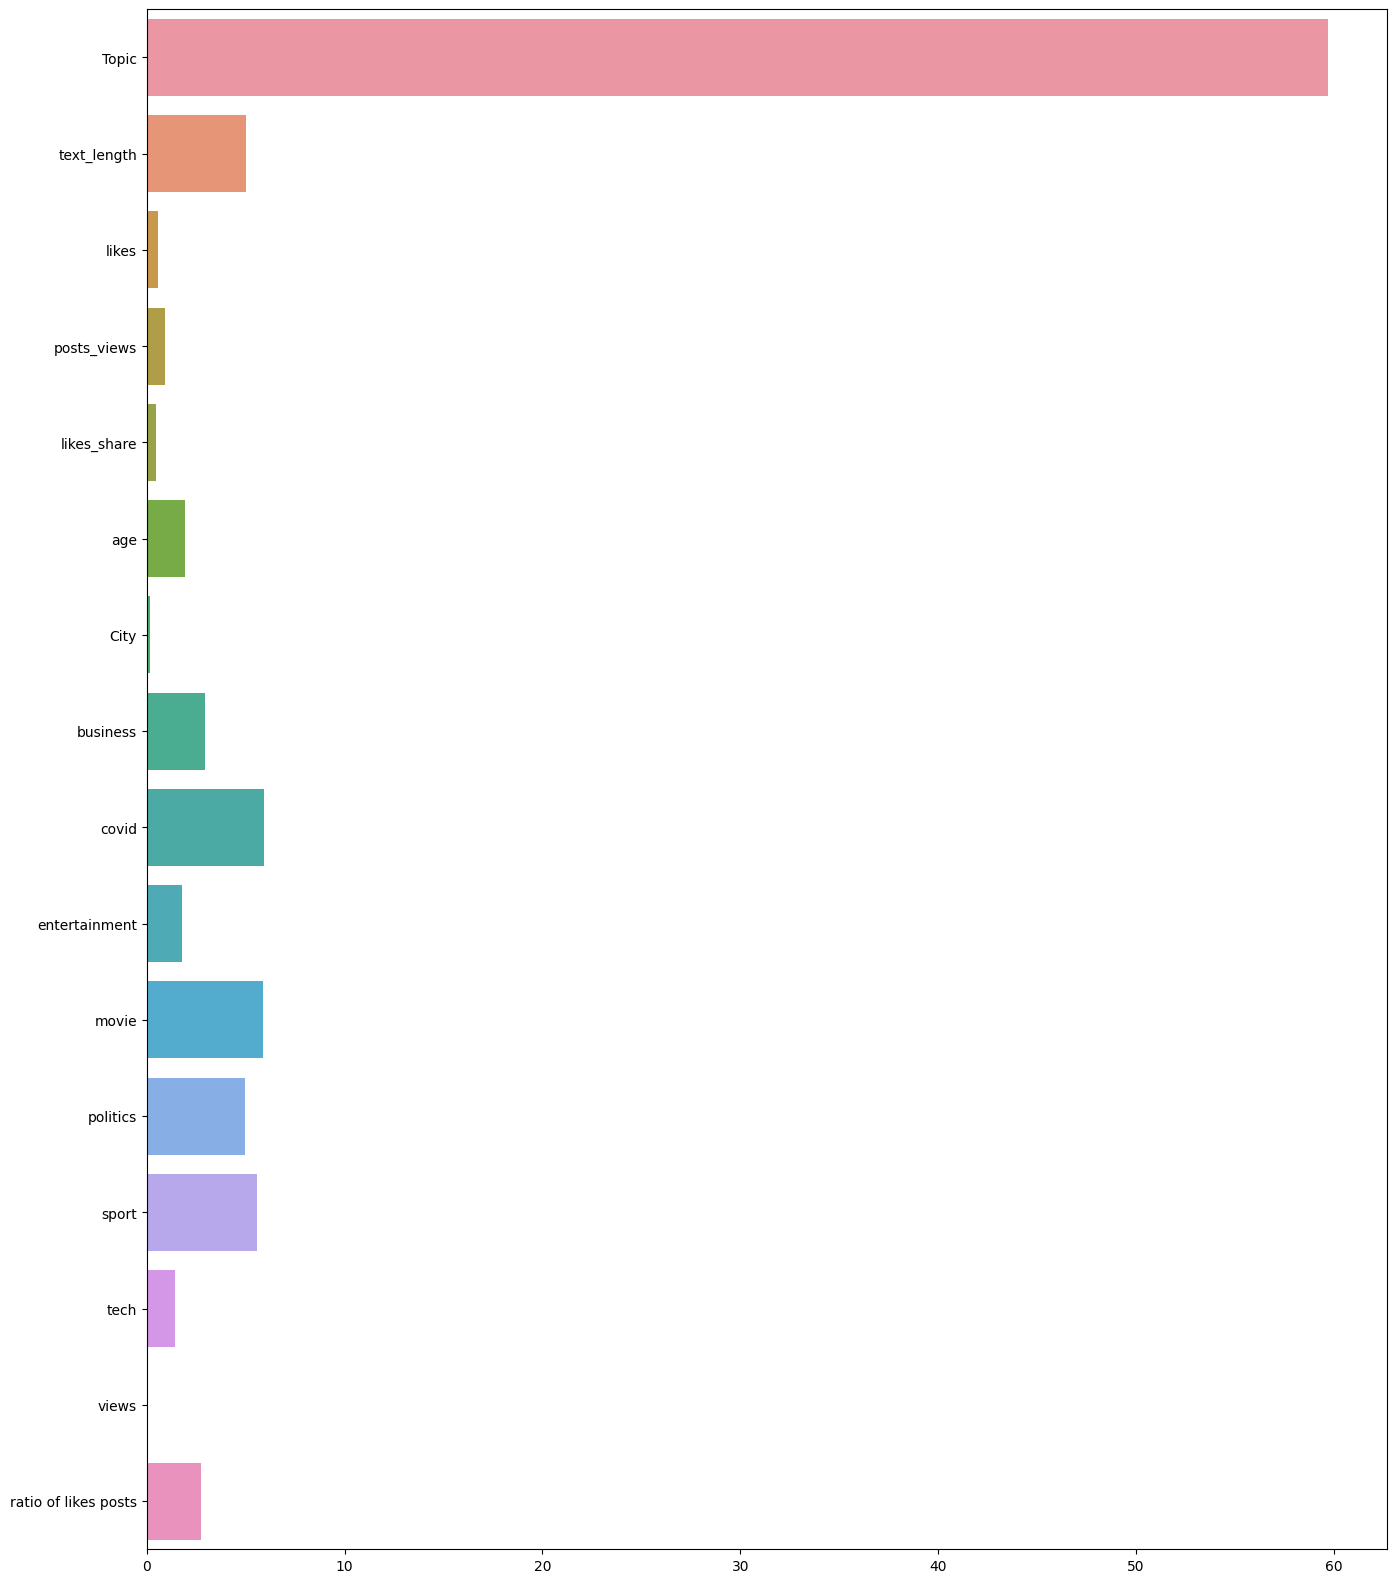

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 20)

sns.barplot(x=cat_boost.feature_importances_,
            y=X_test_clear.columns)


plt.show()

In [78]:
X_test.head()

,user_id,post_id,Topic,text_length,likes,posts_views,likes_share,age,City,business,covid,entertainment,movie,politics,sport,tech,views,ratio of likes posts,prob,target
2037726,88017,986,10.388489,2930,2781.0,22171.0,12.0,40,0.120659,0.333333,0.090909,0.166667,0.052632,0.000000,0.000000,0.000000,113.0,0.061947,0.000016,0
200957,137037,1148,10.388489,1784,881.0,12083.0,7.0,34,0.086395,0.000000,0.000000,0.000000,0.153846,0.000000,0.000000,0.000000,113.0,0.035398,0.000017,0
283555,123437,3002,10.595331,138,2636.0,16858.0,15.0,39,0.126381,0.333333,0.043478,0.200000,0.160000,0.000000,0.200000,0.000000,113.0,0.132743,0.022632,0
3725476,94927,2933,10.595331,138,2608.0,17034.0,15.0,39,0.146697,0.500000,0.156250,0.333333,0.130435,0.000000,0.000000,0.333333,113.0,0.132743,0.085527,0
698568,81148,3648,10.595331,131,1601.0,17396.0,9.0,36,0.185445,0.166667,0.172414,0.500000,0.216216,0.307692,0.333333,0.000000,113.0,0.238938,0.124370,0


In [79]:
users_hitrate = []

for user in X_test['user_id'].unique():
    part = X_test[X_test['user_id']==user]
    part = part.sort_values('prob', ascending=False).head(5).reset_index()
    
    users_hitrate_ = []
    
    for i in part.target:
        if i == 1:
            users_hitrate_.append(1)
        else:
            users_hitrate_.append(0)
    
    users_hitrate_metric =  max(users_hitrate_)
    
    users_hitrate.append(users_hitrate_metric)
    
print(f"Среднее Hitrate@5 по пользователям из теста: {np.mean(users_hitrate)}")

Среднее Hitrate@5 по пользователям из теста: 0.8661143131604226
